## This one is interesting, but ask the instructors if you can use it since it has less than 1000 rows.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Not interested in timestamp so I will drop it.

In [33]:
# Import data
mxmh_df = pd.read_csv('data/mxmh_survey_results.csv')
mxmh_df.drop('Timestamp', axis=1, inplace=True)

Changing string to integers to use the correlation method.

In [36]:
mxmh_df['Primary streaming service'] = mxmh_df['Primary streaming service'].astype('category').cat.codes
mxmh_df

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,18.0,5,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,63.0,4,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,18.0,5,4.0,No,No,No,Video game music,No,Yes,132.0,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,61.0,6,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,18.0,5,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,5,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,18.0,5,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,19.0,3,6.0,Yes,No,Yes,Rap,Yes,No,120.0,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,19.0,5,5.0,Yes,Yes,No,Classical,No,No,170.0,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [3]:
#Mainly interested in mental health of adults due to added stressors
mxmh_adult_df = mxmh_df[mxmh_df['Age']>=18]
mxmh_adult_df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,10/30/2022 13:15:26,21.0,Spotify,2.0,Yes,No,No,R&B,Yes,Yes,...,Very frequently,Sometimes,Sometimes,Sometimes,7.0,6.0,4.0,6.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


<Axes: xlabel='Fav genre'>

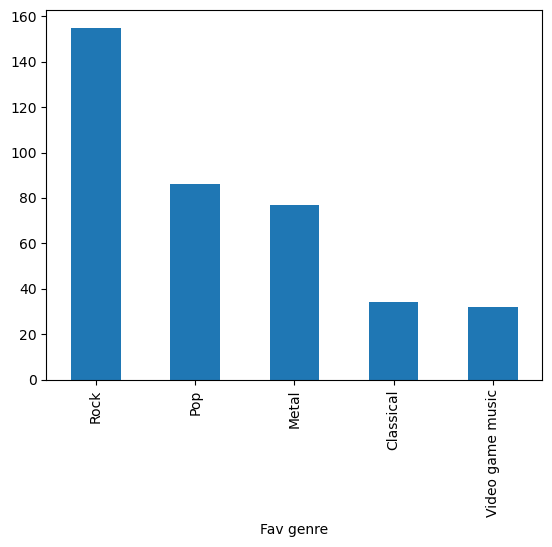

In [4]:
mxmh_adult_df['Fav genre'].value_counts().iloc[0:5].plot.bar('Fav genre')


In [5]:
#How many people share my fav genre with me
mxmh_adult_df[mxmh_adult_df['Fav genre'] == 'Rap']
#15/582 = 2.58%

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
52,8/28/2022 12:52:19,23.0,Apple Music,1.0,No,No,No,Rap,No,Yes,...,Rarely,Very frequently,Very frequently,Rarely,10.0,6.0,3.0,10.0,No effect,I understand.
212,8/28/2022 21:31:40,18.0,Spotify,3.0,Yes,No,No,Rap,Yes,Yes,...,Rarely,Very frequently,Very frequently,Very frequently,8.0,9.0,0.0,0.0,Improve,I understand.
252,8/28/2022 23:47:13,23.0,Other streaming service,6.0,Yes,No,No,Rap,Yes,Yes,...,Very frequently,Sometimes,Rarely,Never,3.0,1.0,2.0,7.0,Improve,I understand.
397,8/29/2022 20:04:14,18.0,Apple Music,2.0,Yes,Yes,No,Rap,Yes,Yes,...,Sometimes,Very frequently,Rarely,Sometimes,3.0,2.0,0.0,2.0,Improve,I understand.
403,8/29/2022 21:24:24,21.0,Apple Music,1.0,No,No,No,Rap,No,No,...,Sometimes,Sometimes,Rarely,Never,4.0,3.0,4.0,5.0,Improve,I understand.
431,8/31/2022 5:45:08,19.0,YouTube Music,3.0,No,Yes,No,Rap,Yes,Yes,...,Rarely,Very frequently,Sometimes,Sometimes,3.0,3.0,0.0,0.0,Improve,I understand.
507,9/2/2022 3:27:21,27.0,Other streaming service,4.0,Yes,No,No,Rap,Yes,No,...,Never,Very frequently,Rarely,Rarely,7.0,6.0,6.0,5.0,Improve,I understand.
545,9/3/2022 14:08:20,18.0,Spotify,2.0,No,No,No,Rap,Yes,Yes,...,Rarely,Very frequently,Rarely,Very frequently,6.0,3.0,4.0,2.0,Improve,I understand.
585,9/6/2022 13:26:11,18.0,Apple Music,1.0,No,Yes,No,Rap,Yes,Yes,...,Never,Very frequently,Never,Sometimes,2.0,0.0,3.0,0.0,Improve,I understand.
608,9/10/2022 2:59:03,20.0,Spotify,2.0,Yes,Yes,Yes,Rap,Yes,Yes,...,Sometimes,Very frequently,Sometimes,Sometimes,7.0,5.0,1.0,3.0,Improve,I understand.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

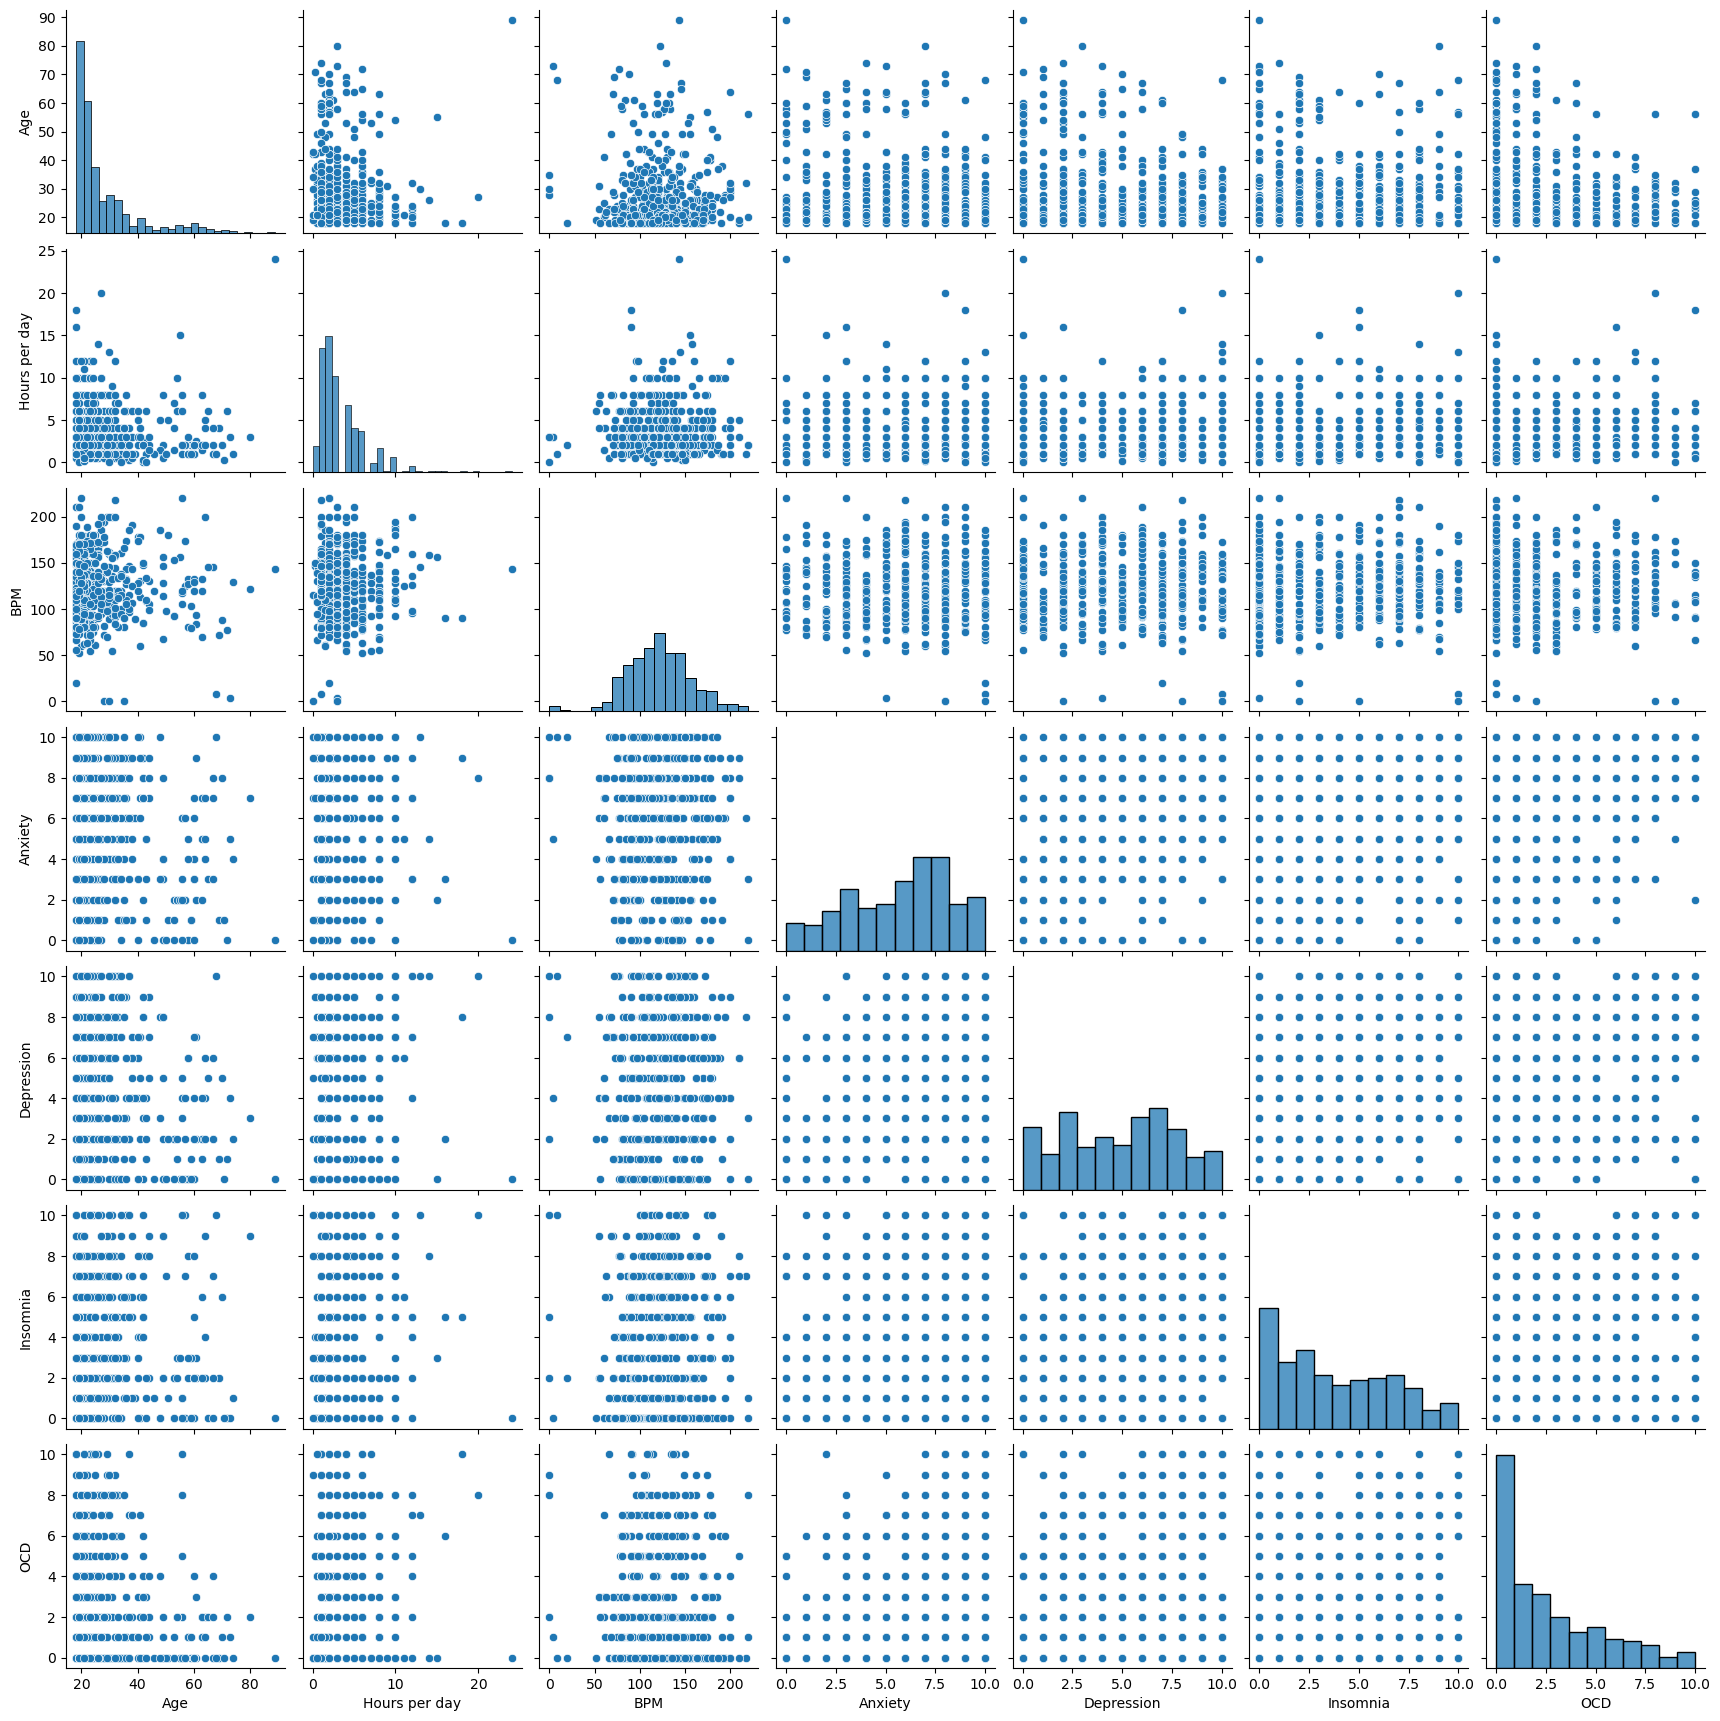

In [6]:
sns.pairplot(mxmh_adult_df)

In [7]:
## Any correlation with ages and different mh disorders
age_w_mh_df = mxmh_adult_df[['Age','Anxiety', 'Depression', 'Insomnia', 'OCD']]
age_w_mh_df.corr()

,Age,Anxiety,Depression,Insomnia,OCD
Age,1.000000,-0.195492,-0.173042,0.020774,-0.126658
Anxiety,-0.195492,1.000000,0.537019,0.294894,0.332591
Depression,-0.173042,0.537019,1.000000,0.370700,0.178301
Insomnia,0.020774,0.294894,0.370700,1.000000,0.198589
OCD,-0.126658,0.332591,0.178301,0.198589,1.000000


In [8]:
mxmh_adult_df['Fav genre'] = mxmh_adult_df['Fav genre'].astype('category').cat.codes
genre_w_mh_df = mxmh_adult_df[['Fav genre', 'Anxiety', 'Depression','Insomnia', 'OCD']]
genre_w_mh_df.corr()

/var/folders/qk/2svbtghj1dl9gr9yy77xdcv40000gn/T/ipykernel_4204/3876560153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mxmh_adult_df['Fav genre'] = mxmh_adult_df['Fav genre'].astype('category').cat.codes


,Fav genre,Anxiety,Depression,Insomnia,OCD
Fav genre,1.000000,0.083908,0.040862,-0.002019,0.011325
Anxiety,0.083908,1.000000,0.537019,0.294894,0.332591
Depression,0.040862,0.537019,1.000000,0.370700,0.178301
Insomnia,-0.002019,0.294894,0.370700,1.000000,0.198589
OCD,0.011325,0.332591,0.178301,0.198589,1.000000


This is just a small tangent I went on out of curiosity

In [9]:
#Willing to bet there is a greater proportion of younger listeners preferring rap than older
mxmh_not_adult_df = mxmh_df[mxmh_df['Age'] < 18]
mxmh_not_adult_df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
15,8/27/2022 23:19:52,17.0,Spotify,2.0,No,No,No,Pop,Yes,Yes,...,Rarely,Sometimes,Sometimes,Rarely,7.0,5.0,4.0,1.0,Worsen,I understand.
16,8/27/2022 23:39:41,16.0,Spotify,8.0,Yes,No,No,Hip hop,Yes,Yes,...,Sometimes,Very frequently,Never,Rarely,8.0,8.0,4.0,3.0,Improve,I understand.
17,8/27/2022 23:39:49,16.0,Spotify,12.0,Yes,No,Yes,Hip hop,Yes,Yes,...,Rarely,Sometimes,Very frequently,Never,5.0,7.0,10.0,0.0,Improve,I understand.
18,8/27/2022 23:40:55,17.0,Spotify,24.0,Yes,No,No,Rap,Yes,No,...,Sometimes,Very frequently,Very frequently,Never,7.0,5.0,0.0,3.0,Improve,I understand.
19,8/27/2022 23:41:36,15.0,Spotify,3.0,No,No,No,Hip hop,No,No,...,Sometimes,Very frequently,Rarely,Never,7.0,3.0,0.0,2.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,10/9/2022 22:15:59,17.0,Spotify,5.0,Yes,No,No,Hip hop,Yes,No,...,Very frequently,Very frequently,Rarely,Rarely,7.0,7.0,5.0,5.0,Improve,I understand.
723,10/14/2022 20:42:26,16.0,Spotify,6.0,Yes,No,No,Pop,Yes,Yes,...,Very frequently,Very frequently,Never,Never,10.0,7.0,6.0,10.0,Improve,I understand.
725,10/22/2022 15:20:29,13.0,Spotify,1.0,Yes,No,No,Video game music,Yes,No,...,Never,Sometimes,Sometimes,Very frequently,10.0,10.0,8.0,4.0,Worsen,I understand.
728,10/30/2022 7:24:08,14.0,Other streaming service,7.0,Yes,Yes,No,Country,Yes,No,...,Sometimes,Sometimes,Very frequently,Rarely,7.0,3.0,1.0,2.0,Improve,I understand.


In [10]:
#7/153
mxmh_not_adult_df[mxmh_not_adult_df['Fav genre']=="Rap"]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
18,8/27/2022 23:40:55,17.0,Spotify,24.0,Yes,No,No,Rap,Yes,No,...,Sometimes,Very frequently,Very frequently,Never,7.0,5.0,0.0,3.0,Improve,I understand.
21,8/28/2022 0:28:02,17.0,Spotify,4.0,Yes,No,No,Rap,Yes,No,...,Never,Very frequently,Sometimes,Never,10.0,10.0,2.0,4.0,Improve,I understand.
141,8/28/2022 18:08:44,16.0,Spotify,2.0,Yes,No,No,Rap,Yes,Yes,...,Very frequently,Very frequently,Never,Sometimes,1.0,8.0,0.0,0.0,No effect,I understand.
320,8/29/2022 5:20:21,13.0,Spotify,10.0,Yes,No,No,Rap,Yes,No,...,Rarely,Very frequently,Never,Rarely,7.0,2.0,0.0,8.0,Improve,I understand.
352,8/29/2022 9:56:31,15.0,YouTube Music,2.0,No,Yes,No,Rap,Yes,Yes,...,Very frequently,Very frequently,Sometimes,Very frequently,4.0,0.0,6.0,5.0,No effect,I understand.
442,8/31/2022 18:56:39,13.0,Spotify,6.0,Yes,No,No,Rap,Yes,No,...,Never,Very frequently,Never,Never,4.0,0.0,0.0,2.0,Worsen,I understand.
550,9/3/2022 16:24:38,17.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Very frequently,Rarely,Never,3.0,3.0,0.0,0.0,Improve,I understand.
